In [ ]:
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install DeepPurpose
!pip install rdkit



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-9b63huht
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-9b63huht
  Resolved https://github.com/bp-kelley/descriptastorus to commit 86eedc60546abe6f59cdbcb12025a61157ba178d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.3/29.3 MB 16.4 MB/s eta 0:00:00
  Created wheel for descriptastorus: filename=descriptastorus-2.5.0.20-py3-none-any.whl size=1083449 sha256=ab2c2782d8a84d16947f94e796c2e76d1f0826d449dbd2e0703b73b077522d7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tdp39ty9/wheels/45/d6/37/fe624913d6e54388bccce05360ccd443eeb01defda346642c2
Successfully built descriptastorus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
from DeepPurpose import DTI
from DeepPurpose.utils import *
from DeepPurpose.dataset import *

X_drug, X_target, y = load_process_DAVIS('./data/', binary=True)
#X_drug, X_target, y = load_process_KIBA('./data/', binary=False)

drug_encoding = 'Transformer'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

Beginning Processing...
Beginning to extract zip file...
Default binary threshold for the binding affinity scores are 30, you can adjust it by using the "threshold" parameter
Done!
Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.67215. Total time 0.00027 hours
Validation at Epoch 1, AUROC: 0.75332 , AUPRC: 0.20942 , F1: 0.0 , Cross-entropy Loss: 1.83839
Training at Epoch 2 iteration 0 with loss 0.16875. Total time 0.02333 hours
Validation at Epoch 2, AUROC: 0.77952 , AUPRC: 0.24969 , F1: 0.0 , Cross-entropy Loss: 1.83839
Training at Epoch 3 iteration 0 with loss 0.14709. Total time 0.04638 hours
Validation at Epoch 3, AUROC: 0.77742 , AUPRC: 0.27121 , F1: 0.0 , Cross-entropy Loss: 1.83839
Training at Epoch 4 iteration 0 with loss 0.12675. Total time 0.06972 hours
Validation at Epoch 4, AUROC: 0.83910 , AUPRC: 0.33691 , F1: 0.0 , Cross-entropy Loss: 1.83839
Training at Epoch 5 iteration 0 with loss 0.13763. Total time 0.09305 hours
Validation at Epoch 5, AUROC: 0.85140 , AUPRC: 0.35307 , F1: 0.0 , Cross-entropy Loss: 1.83839
Training at Epoch 6 iteration 0 with loss 0.20999. Total time 0.11611 hours
Val

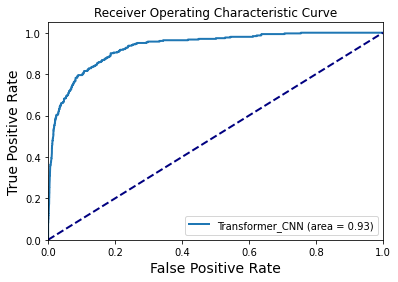

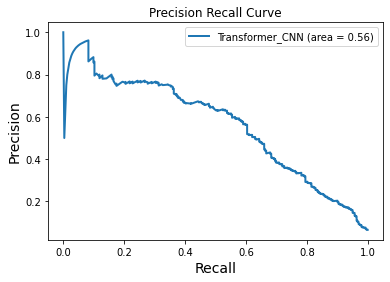

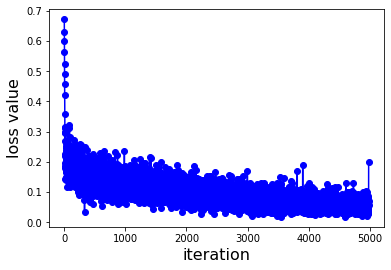

In [ ]:
#transformer cnn 60 epochs

config = generate_config(drug_encoding, target_encoding, transformer_n_layer_target = 8,
                          cls_hidden_dims = [256, 256, 256],
 batch_size=256,
 LR=0.00027356838208477053, train_epoch = 60,
       test_every_X_epoch = 20,)
net = DTI.model_initialize(**config)

# Train the new model.
# Detailed output including a tidy table storing validation loss, metrics, AUC curves figures and etc. are stored in the ./result folder.
net.train(train, val, test)

In [ ]:
from DeepPurpose import DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *


X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub()
target = 'MASKRALVILAKGAEEMETVIPVDVMRRAGIKVTVAGLAGKDPVQCSRDVVICPDASLEDAKKEGPYDVVVLPGGNLGAQNLSESAAVKEILKEQENRKGLIAAICAGPTALLAHEIGFGSKVTTHPLAKDKMMNGGHYTYSENRVEKDGLILTSRGPGTSFEFALAIVEALNGKEVAAQVKAPLVLKD'
target_name = 'PARK7_HUMAN Parkinson disease'

_ = models.repurpose(X_repurpose, target, net, drug_name, target_name)

repurposing...
Drug Target Interaction Prediction Mode...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for PARK7_HUMAN Parkinson disease
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------+-------------+-------------+
| Rank |                                                                  

In [ ]:
from DeepPurpose import DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *


X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub()
target = 'MPRQLSAAAALFASLAVILHDGSQMRAKAFPETRDYSQPTAAATVQDIKKPVQQPAKQAPHQTLAARFMDGHITFQTAATVKIPTTTPATTKNTATTSPITYTLVTTQATPNNSHTAPPVTEVTVGPSLAPYSLPPTITPPAHTTGTSSSTVSHTTGNTTQPSNQTTLPATLSIALHKSTTGQKPVQPTHAPGTTAAAHNTTRTAAPASTVPGPTLAPQPSSVKTGIYQVLNGSRLCIKAEMGIQLIVQDKESVFSPRRYFNIDPNATQASGNCGTRKSNLLLNFQGGFVNLTFTKDEESYYISEVGAYLTVSDPETIYQGIKHAVVMFQTAVGHSFKCVSEQSLQLSAHLQVKTTDVQLQAFDFEDDHFGNVDECSSDYTIVLPVIGAIVVGLCLMGMGVYKIRLRCQSSGYQRI'
target_name = 'LAMP3_HUMAN'

_ = models.repurpose(X_repurpose, target, net, drug_name, target_name)


repurposing...
Drug Target Interaction Prediction Mode...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for LAMP3_HUMAN
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-------------+-------------+
| Rank |                                                                                                      

In [ ]:
from DeepPurpose import DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *


X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub()
target = 'MASEFKKKLFWRAVVAEFLATTLFVFISIGSALGFKYPVGNNQTAVQDNVKVSLAFGLSIATLAQSVGHISGAHLNPAVTLGLLLSCQISIFRALMYIIAQCVGAIVATAILSGITSSLTGNSLGRNDLADGVNSGQGLGIEIIGTLQLVLCVLATTDRRRRDLGGSAPLAIGLSVALGHLLAIDYTGCGINPARSFGSAVITHNFSNHWIFWVGPFIGGALAVLIYDFILAPRSSDLTDRVKVWTSGQVEEYDLDADDINSRVEMKPK'
target_name = 'AQP1_HUMAN'

_ = models.repurpose(X_repurpose, target, net, drug_name, target_name)



repurposing...
Drug Target Interaction Prediction Mode...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for AQP1_HUMAN
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-------------+-------------+
| Rank |                                                                                                       

In [ ]:

from DeepPurpose import DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *


X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub()
target = 'MSDRPTARRWGKCGPLCTRENIMVAFKGVWTQAFWKAVTAEFLAMLIFVLLSLGSTINWGGTEKPLPVDMVLISLCFGLSIATMVQCFGHISGGHINPAVTVAMVCTRKISIAKSVFYIAAQCLGAIIGAGILYLVTPPSVVGGLGVTMVHGNLTAGHGLLVELIITFQLVFTIFASCDSKRTDVTGSIALAIGFSVAIGHLFAINYTGASMNPARSFGPAVIMGNWENHWIYWVGPIIGAVLAGGLYEYVFCPDVEFKRRFKEAFSKAAQQTKGSYMEVEDNRSQVETDDLILKPGVVHVIDVDRGEEKKGKDQSGEVLSSV'
target_name = 'AQP4_HUMAN'

_ = models.repurpose(X_repurpose, target, net, drug_name, target_name)

repurposing...
Drug Target Interaction Prediction Mode...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for AQP4_HUMAN
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-------------+-------------+
| Rank |                                                                                                       

In [ ]:

from DeepPurpose import DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *


X_repurpose, drug_name, drug_cid = load_broad_repurposing_hub()
target = 'MGVPFFSSLRCMVDLGPCWAGGLTAEMKLLLALAGLLAILATPQPSEGAAPAVLGEVDTSLVLSSMEEAKQLVDKAYKERRESIKQRLRSGSASPMELLSYFKQPVAATRTAVRAADYLHVALDLLERKLRSLWRRPFNVTDVLTPAQLNVLSKSSGCAYQDVGVTCPEQDKYRTITGMCNNRRSPTLGASNRAFVRWLPAEYEDGFSLPYGWTPGVKRNGFPVALARAVSNEIVRFPTDQLTPDQERSLMFMQWGQLLDHDLDFTPEPAARASFVTGVNCETSCVQQPPCFPLKIPPNDPRIKNQADCIPFFRSCPACPGSNITIRNQINALTSFVDASMVYGSEEPLARNLRNMSNQLGLLAVNQRFQDNGRALLPFDNLHDDPCLLTNRSARIPCFLAGDTRSSEMPELTSMHTLLLREHNRLATELKSLNPRWDGERLYQEARKIVGAMVQIITYRDYLPLVLGPTAMRKYLPTYRSYNDSVDPRIANVFTNAFRYGHTLIQPFMFRLDNRYQPMEPNPRVPLSRVFFASWRVVLEGGIDPILRGLMATPAKLNRQNQIAVDEIRERLFEQVMRIGLDLPALNMQRSRDHGLPGYNAWRRFCGLPQPETVGQLGTVLRNLKLARKLMEQYGTPNNIDIWMGGVSEPLKRKGRVGPLLACIIGTQFRKLRDGDRFWWENEGVFSMQQRQALAQISLPRIICDNTGITTVSKNNIFMSNSYPRDFVNCSTLPALNLASWREAS'
target_name = 'PERM_HUMAN'

_ = models.repurpose(X_repurpose, target, net, drug_name, target_name)


repurposing...
Drug Target Interaction Prediction Mode...
in total: 6111 drug-target pairs
encoding drug...
unique drugs: 6111
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
Drug Repurposing Result for PERM_HUMAN
+------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+-------------+-------------+
| Rank |                                                                                                       